# Power Spectrum Test

Okay so below I am checking to see the power spectrum in my initial set up with spectrum compared to the modified version I have been working on that will allow me to make the code run faster.

In [1]:
# Core imports man
import sys
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

# Numerical libraries
from scipy.integrate import solve_ivp, odeint, cumulative_trapezoid
from scipy.interpolate import (
    UnivariateSpline, splrep, splev, CubicSpline, 
    interp1d, PchipInterpolator, InterpolatedUnivariateSpline
)
import numdifftools as nd


# Random number generator (GSL)
import pygsl.rng

#custom InflationModels code to path
sys.path.append(
    '/Users/epmeador/Desktop/research/rwarthur/inflation_gravitywaves/inflation_code/InflationModels'
)

# Enable spectra
SPECTRUM = True

# Local modules from InflationModels
from MacroDefinitions import *
from calcpath import *
from int_de import *
if SPECTRUM:
    from spectrum import *

## Randomized Model:

In [10]:
# spectrum_s = np.loadtxt("/Users/epmeador/Desktop/research/rwarthur/inflation_gravitywaves/inflation_code/InflationModels/spec_s000.dat")
# k_generic_s = spectrum_s[:, 0]
# Ps_generic = spectrum_s[:, 1]

# spectrum_t = np.loadtxt("/Users/epmeador/Desktop/research/rwarthur/inflation_gravitywaves/inflation_code/InflationModels/spec_t000.dat")
# k_generic_t = spectrum_t[:, 0]
# Pt_generic = spectrum_t[:, 1]

# plt.plot(k_generic_s, Ps_generic, label="Scalar Spectrum")
# plt.axvline(x=0.05, color='r',linestyle='dashed')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel("log k")
# plt.ylabel("P_s(k)")
# plt.legend()
# plt.show()

# plt.plot(k_generic_t, Pt_generic, label="Tensor Spectrum")
# plt.axvline(x=0.05, color='r',linestyle='dashed')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel("log k")
# plt.ylabel("P_t(k)")
# plt.legend()
# plt.show()





## Higgs Model:

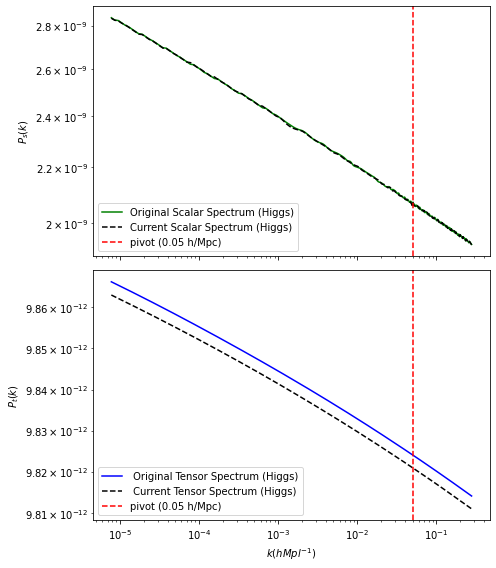

ratio Ps org/Pt current: [1.00088409 1.00026106 1.00054845 ... 1.00069666 1.00063611 1.00056023]
ratio Pt org/Pt current: [1.00032719 1.00032732 1.00032736 ... 1.00031786 1.00031786 1.00031785]


In [9]:
data_s_higgs_original = np.loadtxt("/Users/epmeador/Desktop/research/rwarthur/inflation_gravitywaves/inflation_code/Slow-Roll Parameters Tests/higgs_potential_tests/neqs6/lam3_-4.6e-06_original/spec_s000_neqs6_original.dat")
data_t_higgs_original = np.loadtxt("/Users/epmeador/Desktop/research/rwarthur/inflation_gravitywaves/inflation_code/Slow-Roll Parameters Tests/higgs_potential_tests/neqs6/lam3_-4.6e-06_original/spec_t000_neqs6_original.dat")

k_higgs_s_original = data_s_higgs_original[:,0]   # comoving wavenumber
k_higgs_t_original = data_t_higgs_original[:,0]   # comoving wavenumber
Ps_higgs_original = data_s_higgs_original[:,1]  # scalar spectrum
Pt_higgs_original = data_t_higgs_original[:,1]  # tensor spectrum


data_s_higgs_current = np.loadtxt("/Users/epmeador/Desktop/research/rwarthur/inflation_gravitywaves/inflation_code/Slow-Roll Parameters Tests/higgs_potential_tests/neqs6/lam3_-4.6e-06_current/spec_s000_neqs6_current.dat")
data_t_higgs_current = np.loadtxt("/Users/epmeador/Desktop/research/rwarthur/inflation_gravitywaves/inflation_code/Slow-Roll Parameters Tests/higgs_potential_tests/neqs6/lam3_-4.6e-06_current/spec_t000_neqs6_current.dat")

k_higgs_s_current = data_s_higgs_current[:,0]   # comoving wavenumber
k_higgs_t_current = data_t_higgs_current[:,0]   # comoving wavenumber
Ps_higgs_current = data_s_higgs_current[:,1]  # scalar spectrum
Pt_higgs_current = data_t_higgs_current[:,1]  # tensor spectrum


knorm_hMpc = 0.05  # the conventional pivot in h/Mpc

# Plot
fig, axs = plt.subplots(2, 1, figsize=(7, 8), sharex=True)

# --- Scalar spectrum ---
axs[0].plot(k_higgs_s_original, Ps_higgs_original, label="Original Scalar Spectrum (Higgs)", color="green")
axs[0].plot(k_higgs_s_current, Ps_higgs_current, label="Current Scalar Spectrum (Higgs)", color="k", linestyle='--')
axs[0].axvline(knorm_hMpc, color="red", linestyle="--", label="pivot (0.05 h/Mpc)")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel(r"$P_s(k)$")
axs[0].legend()

# --- Tensor spectrum ---
axs[1].plot(k_higgs_t_original, Pt_higgs_original, label=" Original Tensor Spectrum (Higgs)", color="blue")
axs[1].plot(k_higgs_t_current, Pt_higgs_current, label=" Current Tensor Spectrum (Higgs)", color="k", linestyle='--')
axs[1].axvline(knorm_hMpc, color="red", linestyle="--", label="pivot (0.05 h/Mpc)")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel(r"$P_t(k)$")
axs[1].set_xlabel(r"$k(hMpl^{-1})$")
axs[1].legend()
plt.tight_layout()
#plt.savefig('original_ps.png')
plt.show()


print('ratio Ps org/Pt current:',Ps_higgs_original/Ps_higgs_current)
print('ratio Pt org/Pt current:',Pt_higgs_original/Pt_higgs_current)



## Testing Spectrum

In [12]:
# #To make spectrum:  
    
# def u_mode_WKB(k):
#     # sample N
#     N_vals = np.linspace(Ninit, Nfinal, 500)
#     Q_vals = np.array([Q_of_N(N, k) for N in N_vals])
#     a_vals = np.array([a_of_N(N) for N in N_vals])
#     H_vals = np.array([H_of_N(N) for N in N_vals])

#     # integrand for phase
#     integrand = np.sqrt(np.abs(Q_vals)) / (a_vals * H_vals)
#     phase_vals = cumtrapz(integrand, N_vals, initial=0.0)

#     # amplitude
#     amp = np.abs(Q_of_N(Ninit, k))**(-0.25)

#     # soln
#     u_vals = 2.0 * amp * np.sin(phase_vals + np.pi/4)

#     # final value at N=0
#     return np.abs(u_vals[-1])


# k_vals = np.logspace(-6, -2, 40)   # k range
# P_t = []
# for k in k_vals:
#     u = u_mode_WKB(k)
#     P_t_val = (8 * k**3 / (2*np.pi**2)) * (u**2) / (a_of_N(Nfinal)**2)
#     P_t.append(P_t_val)

# P_t = np.array(P_t)

# # plot
# plt.loglog(k_vals, P_t, label="Toy tensor spectrum")
# plt.axvline(H0, color="r", ls="--", label="horizon scale ~ H0")
# plt.xlabel("k")
# plt.ylabel("P_t(k)")
# plt.legend()
# plt.show()